In [13]:
from sklearn.datasets import make_regression

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [14]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

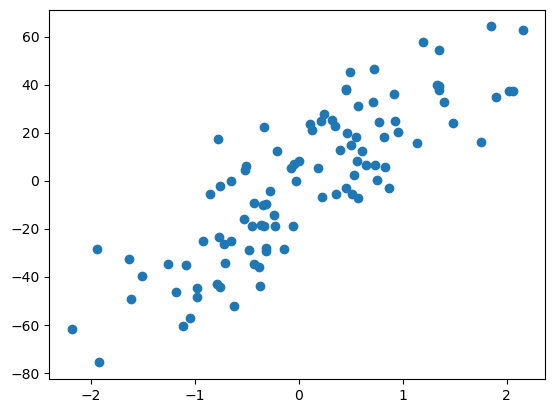

In [15]:
plt.scatter(x,y)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.2947445586769795


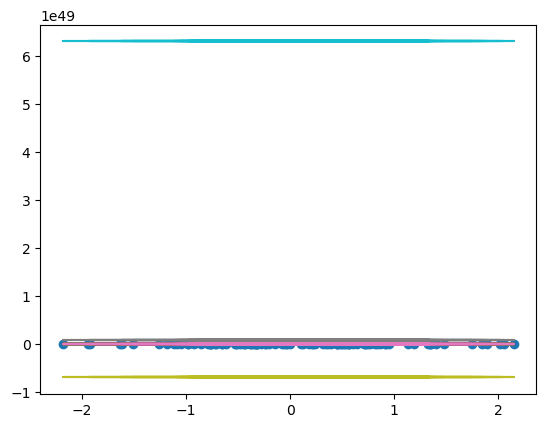

In [35]:
# now fixing m and alowing b to change
#plt.figure(figsize = (15,15))
m = np.round(reg.coef_,2)
b = 120 # starting with this random value
lr = 0.05

b_lst = []
costlst = []

epochs = 50
for i in range(epochs):
    # to store the values of the cost function to make a curve
    # we'll run a loop for each row of the data to update the cost at each calculation of slope
    # this could also be achieved without this inner loop using numpy's vectorized operations
    der = 0
    cost = 0
    for j in range(x.shape[0]):
        # for each row do
        der = der - 2*(y[j]-m*x[j]-b) # minus comes from the fact ki slope ka derivative m hi minus h
        cost = cost + (y[j] - m*x[j] - b)**2
        
    costlst.append(cost)
    b = b - lr*der
    b_lst.append(b)
    y_pred = m*x + b
    plt.plot(x,y_pred)
    
plt.scatter(x,y)


### This above can be achieved by numpy's vectorized operations as well

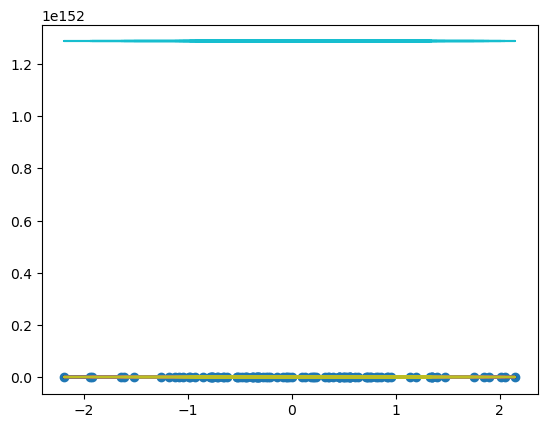

In [29]:
# now fixing m and alowing b to change
m = np.round(reg.coef_,2)
b = 120 # starting with this random value
lr = 0.05

b_lst2 = []
costlst2 = []

epochs = 50

for i in range(epochs):
    preds = y - m*x - b
    der = 2*np.sum(preds) 
    cost = np.sum(preds**2)
        
    costlst2.append(cost)
    b = b - lr*der
    b_lst2.append(b)
    
    y_pred = m*x + b
    plt.plot(x,y_pred)
    
plt.scatter(x,y)


In [30]:
b_lst == b_lst2

False

In [31]:
[1,2,3] == [1,2,3]

True

In [39]:
# you can use NumPy's np.allclose function, which allows for a small tolerance when comparing floating-point numbers:
are_equal = np.allclose(b_lst, b_lst2, atol=1e-8)
are_equal

False

#### why false
The cumulative sum in the loop (der = der - 2*(y[j]-m*x[j]-b)) might introduce small rounding errors compared to the vectorized operation der = 2*np.sum(preds).
Although both approaches are mathematically equivalent, the order in which floating-point operations are performed can lead to slightly different results due to the way computers handle floating-point arithmetic.

In [20]:
np.array(b_lst).shape#.ravel

(100, 1)

In [22]:
b_lst = np.array(b_lst).ravel()

In [23]:
costlst = np.array(costlst).ravel()

In [24]:
costlst

array([1.52394546e+006, 1.21172200e+008, 9.81268082e+009, 7.94824879e+011,
       6.43808129e+013, 5.21484584e+015, 4.22402513e+017, 3.42146036e+019,
       2.77138289e+021, 2.24482014e+023, 1.81830431e+025, 1.47282649e+027,
       1.19298946e+029, 9.66321463e+030, 7.82720385e+032, 6.34003512e+034,
       5.13542845e+036, 4.15969704e+038, 3.36935460e+040, 2.72917723e+042,
       2.21063356e+044, 1.79061318e+046, 1.45039668e+048, 1.17482131e+050,
       9.51605259e+051, 7.70800260e+053, 6.24348210e+055, 5.05722050e+057,
       4.09634861e+059, 3.31804237e+061, 2.68761432e+063, 2.17696760e+065,
       1.76334376e+067, 1.42830844e+069, 1.15692984e+071, 9.37113169e+072,
       7.59061667e+074, 6.14839950e+076, 4.98020360e+078, 4.03396492e+080,
       3.26751158e+082, 2.64668438e+084, 2.14381435e+086, 1.73648962e+088,
       1.40655659e+090, 1.13931084e+092, 9.22841781e+093, 7.47501843e+095,
       6.05476493e+097, 4.90435959e+099, 3.97253127e+101, 3.21775033e+103,
       2.60637777e+105, 2